### 전 계좌 조회

In [251]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from urllib.request import urlopen
from urllib.parse import urlencode, unquote, quote_plus
import requests, json
import pandas as pd

def callAPI01():
    # 데이터를 받고자하는 사이트의 포멧에 맞게 url을 수정하고 보내는 코드
    url01 = 'https://openapi.wooribank.com:444/oai/wb/v1/finance/getIndivAllAccInfo?'
    values01  = {
      "dataHeader": {
        "UTZPE_CNCT_IPAD": "",
        "UTZPE_CNCT_MCHR_UNQ_ID": "",
        "UTZPE_CNCT_TEL_NO_TXT": "",
        "UTZPE_CNCT_MCHR_IDF_SRNO": "",
        "UTZ_MCHR_OS_DSCD": "",
        "UTZ_MCHR_OS_VER_NM": "",
        "UTZ_MCHR_MDL_NM": "",
        "UTZ_MCHR_APP_VER_NM": ""
      },
      "dataBody": {}
    }
    headers01 = {  'appkey':'l7xxyuXx5JXUfAkmjfHJ8lZEKWn9QbsNzbal',  'Content-Type':'application/json; charset=utf-8' }
    post_data01 = requests.post(url01, json = values01, headers = headers01)
    result_data01 = post_data01.json()
    items01 = result_data01['dataBody']['GRID']
    AllAcc =pd.DataFrame(items01)
    return AllAcc['PBOK_BAL'].astype('float').sum()

In [2]:
callAPI01()

110815150.0

### 계좌 기본 조회

In [14]:
url02 = 'https://openapi.wooribank.com:444/oai/wb/v1/finance/getAccBasicInfo?'
values02  = {
  "dataHeader": {
    "UTZPE_CNCT_IPAD": "",
    "UTZPE_CNCT_MCHR_UNQ_ID": "",
    "UTZPE_CNCT_TEL_NO_TXT": "",
    "UTZPE_CNCT_MCHR_IDF_SRNO": "",
    "UTZ_MCHR_OS_DSCD": "",
    "UTZ_MCHR_OS_VER_NM": "",
    "UTZ_MCHR_MDL_NM": "",
    "UTZ_MCHR_APP_VER_NM": ""
  },
  "dataBody": {
    "INQ_ACNO": "1002123456789",
    "INQ_BAS_DT": "20210220",
    "ACCT_KND": "P",
    "INQ_CUCD": "KRW"
  }
}
headers02 = {  'appkey':'l7xxyuXx5JXUfAkmjfHJ8lZEKWn9QbsNzbal',  'Content-Type':'application/json; charset=utf-8' }
post_data02 = requests.post(url02, json = values02, headers = headers02)
result_data02 = post_data02.json()
#print(result_data)
items02 = result_data02['dataBody']
AccBasic =pd.DataFrame.from_records([items02])
AccBasic

,ACNO,DPS_STCD,CUCD,CT_BAL,PAY_AVL_AM,NEW_DT,XPR_DT,TXTR_PDCD,MM_PID_AM,FDN_DSCD,TDY_EVL_AM,IVST_PRN,SMPL_PRFT_RT,LST_LN_PCS_AM
0,10089174*****,01,KRW,3875030.000,8075030.000,2020-11-03,2021-11-03,,4350000.000,00,0,0,,


In [15]:
url03 = 'https://openapi.wooribank.com:444/oai/wb/v1/finance/getAccTransList?'
values03  = {
  "dataHeader": {
    "UTZPE_CNCT_IPAD": "",
    "UTZPE_CNCT_MCHR_UNQ_ID": "",
    "UTZPE_CNCT_TEL_NO_TXT": "",
    "UTZPE_CNCT_MCHR_IDF_SRNO": "",
    "UTZ_MCHR_OS_DSCD": "",
    "UTZ_MCHR_OS_VER_NM": "",
    "UTZ_MCHR_MDL_NM": "",
    "UTZ_MCHR_APP_VER_NM": ""
  },
  "dataBody": {
    "INQ_ACNO": "1002123456789",
    "INQ_STA_DT": "20210101",
    "INQ_END_DT": "20210310",
    "NEW_DT": "20140522",
    "ACCT_KND": "P",
    "CUCD": "KRW"
  }
}
headers03 = {  'appkey':'l7xxyuXx5JXUfAkmjfHJ8lZEKWn9QbsNzbal',  'Content-Type':'application/json; charset=utf-8' }
post_data03 = requests.post(url03, json = values03, headers = headers03)
result_data03 = post_data03.json()
#print(result_data)
items03 = result_data03['dataBody']['GRID']
AccTrans =pd.DataFrame(items03)
AccTrans

,TRN_DT,TRN_TM,TRN_SRNO,CUCD,PBOK_PRNG_OTLN_CD,DPS_RAP_KDCD,MD_KDCD,RCV_AM,PAY_AM,DPS_BAL,TRN_TXT,PID_SQ,TRN_STCD
0,2021-04-29,121322,7,KRW,0318,200,MIBMPSB2,0.000,485000.000,468000000.000,홍길동,0,107800000.000
1,2021-04-25,081050,1,KRW,0318,200,MIBMPSB2,062000.000,0.000,208600000.000,카드취소,0,628600000.000
2,2021-04-02,174257,3,KRW,0318,100,MIBMPSB2,0.000,177000.000,473000000.000,월급여,0,575600000.000


In [50]:
def callAPI04():
    url04 = 'https://openapi.wooribank.com:444/oai/wb/v1/credit/getCreditLoanEmFnd?'
    values04  = {
      "dataHeader": {
        "UTZPE_CNCT_IPAD": "",
        "UTZPE_CNCT_MCHR_UNQ_ID": "",
        "UTZPE_CNCT_TEL_NO_TXT": "",
        "UTZPE_CNCT_MCHR_IDF_SRNO": "",
        "UTZ_MCHR_OS_DSCD": "",
        "UTZ_MCHR_OS_VER_NM": "",
        "UTZ_MCHR_MDL_NM": "",
        "UTZ_MCHR_APP_VER_NM": ""
      },
      "dataBody": {
        "ENCY_ACNM_NO": "11111111111111111111",
        "CUS_KORL_NM": "홍길동",
        "RQ_AM": "30000000"
      }
    }
    headers04 = {  'appkey':'l7xxyuXx5JXUfAkmjfHJ8lZEKWn9QbsNzbal',  'Content-Type':'application/json; charset=utf-8' }
    post_data04 = requests.post(url04, json = values04, headers = headers04)
    result_data04 = post_data04.json()
    #print(result_data)
    items04 = result_data04['dataBody']
    CreditLimit =pd.DataFrame.from_records([items04])
    return CreditLimit['APV_AM'][0]

In [51]:
callAPI04()

3000000.0

In [16]:
def callAPI05():
    url05 = 'https://openapi.wooribank.com:444/oai/wb/v1/credit/getCreditLoanWon?'
    values05  = {
      "dataHeader": {
        "UTZPE_CNCT_IPAD": "",
        "UTZPE_CNCT_MCHR_UNQ_ID": "",
        "UTZPE_CNCT_TEL_NO_TXT": "",
        "UTZPE_CNCT_MCHR_IDF_SRNO": "",
        "UTZ_MCHR_OS_DSCD": "",
        "UTZ_MCHR_OS_VER_NM": "",
        "UTZ_MCHR_MDL_NM": "",
        "UTZ_MCHR_APP_VER_NM": ""
      },
      "dataBody": {
        "ENCY_ACNM_NO": "1111111111111",
        "CUS_KORL_NM": "홍길동",
        "RQ_AM": "10000000",
        "BZPE_CRNO": "1002030000",
        "ENCN_DT": "1",
        "HLD_YINC_AM": "1",
        "ORG_NAME": "1",
        "EXTR_IDF_REFC_KEY_TXT": "woori202101011234567"
      }
    }
    headers05 = {  'appkey':'l7xxyuXx5JXUfAkmjfHJ8lZEKWn9QbsNzbal',  'Content-Type':'application/json; charset=utf-8' }
    post_data05 = requests.post(url05, json = values05, headers = headers05)
    result_data05 = post_data05.json()
    #print(result_data)
    items05 = result_data05['dataBody']
    WonLimit = pd.DataFrame.from_records([items05])
    return WonLimit['APV_AM'][0]

In [26]:
callAPI05()

12900000.0

In [17]:
def callAPI06():
    url06 = 'https://openapi.wooribank.com:444/oai/wb/v1/newcar/getNewCarLoanAm?'
    values06  = {
      "dataHeader": {
        "UTZPE_CNCT_IPAD": "",
        "UTZPE_CNCT_MCHR_UNQ_ID": "",
        "UTZPE_CNCT_TEL_NO_TXT": "",
        "UTZPE_CNCT_MCHR_IDF_SRNO": "",
        "UTZ_MCHR_OS_DSCD": "",
        "UTZ_MCHR_OS_VER_NM": "",
        "UTZ_MCHR_MDL_NM": "",
        "UTZ_MCHR_APP_VER_NM": ""
      },
      "dataBody": {
        "DBPE_ANL_ICM_AM": "15000000",
        "GRN_NCAR_YN": "Y",
        "CAR_PR": "30000000",
        "CRINF_INQ_AGR_YN": "Y",
        "INF_OFR_MND_AGR_YN": "Y",
        "GAT_UTZ_MND_AGR_YN": "Y",
        "CUS_IDF_INF_AGR_YN": "Y",
        "INF_OFR_CHC_AGR_YN": "Y",
        "GAT_UTZ_CHC_AGR_YN": "Y"
      }
    }
    headers06 = {  'appkey':'l7xxyuXx5JXUfAkmjfHJ8lZEKWn9QbsNzbal',  'Content-Type':'application/json; charset=utf-8' }
    post_data06 = requests.post(url06, json = values06, headers = headers06)
    result_data06 = post_data06.json()
    #print(result_data)
    items06 = result_data06['dataBody']
    NewCar =pd.DataFrame.from_records([items06])
    return NewCar['LN_AVL_AM'][0]

In [19]:
def callAPI07():
    url07 = 'https://openapi.wooribank.com:444/oai/wb/v1/lease/getLeaseHouseLoanAm?'
    values07  = {
      "dataHeader": {
        "UTZPE_CNCT_IPAD": "",
        "UTZPE_CNCT_MCHR_UNQ_ID": "",
        "UTZPE_CNCT_TEL_NO_TXT": "",
        "UTZPE_CNCT_MCHR_IDF_SRNO": "",
        "UTZ_MCHR_OS_DSCD": "",
        "UTZ_MCHR_OS_VER_NM": "",
        "UTZ_MCHR_MDL_NM": "",
        "UTZ_MCHR_APP_VER_NM": ""
      },
      "dataBody": {
        "CRINF_INQ_AGR_YN": "Y",
        "PSN_INF_OFR_AGR_YN": "Y",
        "PRCI_UTZ_AGR_YN": "Y",
        "SLF_ANL_ICM_AM": "67000000",
        "ADR_KDCD": "3",
        "POST_SRNO": "0",
        "BLD_MNG_NO": "1111111111",
        "MDBT_RQ_AM": "0",
        "LEAS_GRN_AM": "70000000",
        "LAWC_ADDN_NO": ""
      }
    }
    headers07 = {  'appkey':'l7xxyuXx5JXUfAkmjfHJ8lZEKWn9QbsNzbal',  'Content-Type':'application/json; charset=utf-8' }
    post_data07 = requests.post(url07, json = values07, headers = headers07)
    result_data07 = post_data07.json()
    #print(result_data)
    items07 = result_data07['dataBody']
    HouseLoan =pd.DataFrame.from_records([items07])
    return HouseLoan['FRCS_AVL_LN_AM'][0]

In [20]:
def callAPI08():
    url08 = 'https://openapi.wooribank.com:444/oai/wb/v1/apt/getAptLoanAm?'
    values08  = {
      "dataHeader": {
        "UTZPE_CNCT_IPAD": "",
        "UTZPE_CNCT_MCHR_UNQ_ID": "",
        "UTZPE_CNCT_TEL_NO_TXT": "",
        "UTZPE_CNCT_MCHR_IDF_SRNO": "",
        "UTZ_MCHR_OS_DSCD": "",
        "UTZ_MCHR_OS_VER_NM": "",
        "UTZ_MCHR_MDL_NM": "",
        "UTZ_MCHR_APP_VER_NM": ""
      },
      "dataBody": {
        "TRN_KD_DIS": "01",
        "APT_DJ_CD": "11111111",
        "PYT": "34",
        "PYT_TYP_TXT": "A",
        "MKPR_BAS_DT": "20200314",
        "GEN_TRN_AM": "780000000",
        "SB_ULPR": "820000000",
        "SB_LLPR": "750000000",
        "RNT_ULPR": "0",
        "RNT_LLPR": "0",
        "SIDO_CD": "01",
        "ACDS_CD": "010",
        "DNEM_CD": "050",
        "LI_CD": "01",
        "BLD_NM": "ooo 아파트",
        "DONG_ADR": "서울시 동대문구 장안0동 ",
        "HO_ADR": "A동 000호",
        "ALL_FCNT": "25",
        "EQV_FCNT": "12",
        "TOT_HHLD_CN": "644",
        "SQM": "108",
        "ALL_ROOM_NCNT": "",
        "RNT_ROOM_NCNT": "0",
        "LTHR_AM": "0",
        "PRK_AM": "0",
        "LN_MECN": "48",
        "CNAD_TEL_NO_1": "01012345678",
        "CNAD_TEL_NO_2": "",
        "CNAD_TEL_NO_3": "",
        "RQPE_ITCSNO": "1111111111111",
        "RQPE_FNM": "홍길동",
        "INET_CNSL_TRN_DSCD": "1",
        "APT_EVL_ISCD": "3",
        "MKPR_DSCD": "1",
        "LN_HOPE_BRCD": "111111",
        "LN_RQ_AM": "200000000",
        "ADVPE_ENO": "11111111",
        "FD_USCD": "2",
        "LN_HOPE_DT": "20210214",
        "BZBR_COLPE_ALOC_YN": "Y"
      }
    }
    headers08 = {  'appkey':'l7xxyuXx5JXUfAkmjfHJ8lZEKWn9QbsNzbal',  'Content-Type':'application/json; charset=utf-8' }
    post_data08 = requests.post(url08, json = values08, headers = headers08)
    result_data08 = post_data08.json()
    #print(result_data)
    items08 = result_data08['dataBody']
    AptLoan =pd.DataFrame.from_records([items08])
    return AptLoan['LN_AVL_AM'][0]

### 필요한 데이터 뽑아내기

In [22]:
FinancialData = pd.DataFrame(columns=['Total Assets', '신용 대출 한도', '직장인 대출 한도', 
                                      '신차 대출 한도', '전세 자금 대출 한도', '아파트 담보 대출 한도' ])

In [252]:
FinancialData

,Total Assets,신용 대출 한도,직장인 대출 한도,신차 대출 한도,전세 자금 대출 한도,아파트 담보 대출 한도
idx,,,,,,
NaN,25225150.0,3000000.0,31500000.0,12000000,43500000,19500000
NaN,82565150.0,3000000.0,40300000.0,58000000,19500000,43500000
NaN,22675150.0,3000000.0,29400000.0,72600000,45500000,76500000
NaN,110815150.0,3000000.0,88400000.0,75400000,08500000,85500000
NaN,115975150.0,3000000.0,69000000.0,31900000,07500000,81500000
...,...,...,...,...,...,...
0.0,98665150.0,3000000.0,87200000.0,19600000,78500000,28500000
1.0,46635150.0,3000000.0,89300000.0,71000000,45500000,12500000
2.0,114125150.0,3000000.0,39500000.0,75300000,87500000,63500000


In [295]:
for idx in range(5):
    # DataFrame에 특정 정보를 이용하여 data 채우기
    FinancialData = FinancialData.append(pd.DataFrame([[idx, callAPI01(), callAPI04(),callAPI05(),callAPI06(), callAPI07(),callAPI08()]], 
                                                      columns=['idx','Total Assets', '신용 대출 한도', '직장인 대출 한도','신차 대출 한도', '전세 자금 대출 한도', '아파트 담보 대출 한도' ]), ignore_index=True)
FinancialData.set_index('idx', inplace=True)

In [299]:
FinancialData

,Total Assets,신용 대출 한도,직장인 대출 한도,신차 대출 한도,전세 자금 대출 한도,아파트 담보 대출 한도
idx,,,,,,
NaN,25225150.0,3000000.0,31500000.0,12000000,43500000,19500000
NaN,82565150.0,3000000.0,40300000.0,58000000,19500000,43500000
NaN,22675150.0,3000000.0,29400000.0,72600000,45500000,76500000
NaN,110815150.0,3000000.0,88400000.0,75400000,08500000,85500000
NaN,115975150.0,3000000.0,69000000.0,31900000,07500000,81500000
...,...,...,...,...,...,...
0.0,90325150.0,3000000.0,33900000.0,59600000,09500000,74500000
1.0,35235150.0,3000000.0,23000000.0,04800000,84500000,89500000
2.0,96755150.0,3000000.0,58700000.0,81500000,26500000,91500000


In [300]:
FinancialData['idx'] = [i for i in range(1,514)]

In [301]:
FinancialData

,Total Assets,신용 대출 한도,직장인 대출 한도,신차 대출 한도,전세 자금 대출 한도,아파트 담보 대출 한도,idx
idx,,,,,,,
NaN,25225150.0,3000000.0,31500000.0,12000000,43500000,19500000,1
NaN,82565150.0,3000000.0,40300000.0,58000000,19500000,43500000,2
NaN,22675150.0,3000000.0,29400000.0,72600000,45500000,76500000,3
NaN,110815150.0,3000000.0,88400000.0,75400000,08500000,85500000,4
NaN,115975150.0,3000000.0,69000000.0,31900000,07500000,81500000,5
...,...,...,...,...,...,...,...
0.0,90325150.0,3000000.0,33900000.0,59600000,09500000,74500000,509
1.0,35235150.0,3000000.0,23000000.0,04800000,84500000,89500000,510
2.0,96755150.0,3000000.0,58700000.0,81500000,26500000,91500000,511


In [302]:
FinancialData.set_index('idx', inplace=True)

In [303]:
FinancialData

,Total Assets,신용 대출 한도,직장인 대출 한도,신차 대출 한도,전세 자금 대출 한도,아파트 담보 대출 한도
idx,,,,,,
1,25225150.0,3000000.0,31500000.0,12000000,43500000,19500000
2,82565150.0,3000000.0,40300000.0,58000000,19500000,43500000
3,22675150.0,3000000.0,29400000.0,72600000,45500000,76500000
4,110815150.0,3000000.0,88400000.0,75400000,08500000,85500000
5,115975150.0,3000000.0,69000000.0,31900000,07500000,81500000
...,...,...,...,...,...,...
509,90325150.0,3000000.0,33900000.0,59600000,09500000,74500000
510,35235150.0,3000000.0,23000000.0,04800000,84500000,89500000
511,96755150.0,3000000.0,58700000.0,81500000,26500000,91500000


## 데이터 csv화 

In [305]:
FinancialData.to_csv('data_by_우리은행_금융api5.csv')

# api로 받은 데이터 eda

In [306]:
FinancialData['직장인 대출 한도'].values

array([31500000., 40300000., 29400000., 88400000., 69000000., 75300000.,
       97900000., 88000000., 73600000., 39200000., 54700000., 26200000.,
       77400000., 87400000., 84700000., 79000000., 49400000., 43400000.,
       97100000., 10800000., 87600000., 28800000., 80900000., 32300000.,
       73800000., 31400000., 38900000., 18000000., 76200000., 22500000.,
       68200000., 73300000., 60600000., 26700000., 66800000., 28700000.,
       19800000., 47800000., 32900000., 66900000., 30400000., 80900000.,
       32800000., 13500000., 65900000., 51400000., 23300000., 51300000.,
       34000000., 64700000., 21200000., 56400000., 53200000., 71600000.,
       53900000., 12200000., 28700000., 56500000., 53600000., 80500000.,
       61500000., 27000000., 36600000., 95200000., 99600000., 68500000.,
       69500000., 80100000., 67300000., 22100000., 72100000., 16600000.,
       78000000., 97600000., 16100000., 13800000., 99000000., 49800000.,
       91900000., 87600000., 34200000., 91800000., 

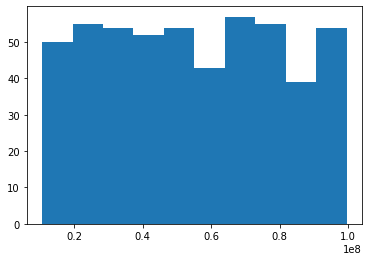

In [307]:
_ = plt.hist(FinancialData['직장인 대출 한도'].values) 

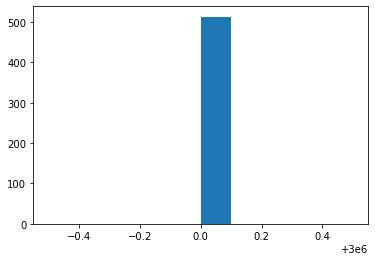

In [308]:
_ = plt.hist(FinancialData['신용 대출 한도'].values) 

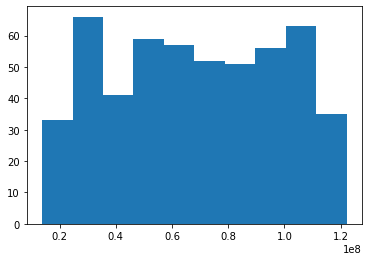

In [309]:
_ = plt.hist(FinancialData['Total Assets'].values)

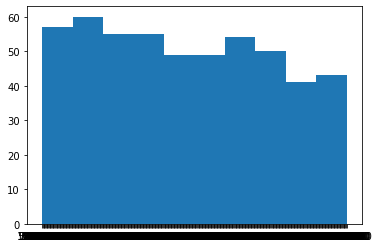

In [310]:
_ = plt.hist(FinancialData['신차 대출 한도'].values)

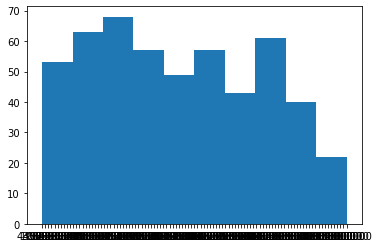

In [311]:
_ = plt.hist(FinancialData['전세 자금 대출 한도'].values)

전세 자금 대출한도는 수치가 앞에 0이 들어가는게 있어서 변형함

In [312]:
b = []
for i in FinancialData['전세 자금 대출 한도'].values :
    b.append(i.lstrip("0"))

(array([53., 63., 68., 57., 49., 57., 43., 61., 40., 22.]),
 array([ 0. ,  9.8, 19.6, 29.4, 39.2, 49. , 58.8, 68.6, 78.4, 88.2, 98. ]),
 <BarContainer object of 10 artists>)

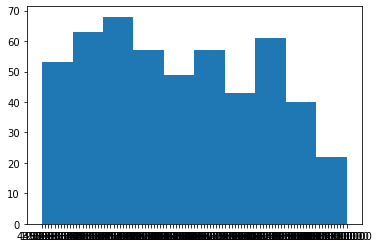

In [313]:
plt.hist(b)

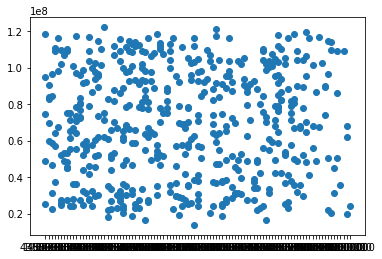

In [315]:
plt.scatter(b,FinancialData['Total Assets'].values)

값 자체가 total assets와 신체 대출 한도의 연관성은 없었음